## Abdul Musa Yusuf -- CE263N/CP257

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 

In [2]:
# To begin I will be reading in the data. 
df = pd.read_csv (r'ce263n_cyplan257_nodes.csv')

In [3]:
df.head()

,Node ID,Name,Email Address,Majors
0,1,"Adelkar, Siddharth",Siddharth Adelkar,Info Mgmt & Systems MIMS
1,2,"Aldamer, Abdullah",Abdullah Aldamer,Civil & Environmental Eng MEng
2,3,"Almusafri, Sara",Sara Almusafri,Development Engineering MDE
3,4,"Alshehri, Ibtihal",Ibtihal Alshehri,Development Engineering MDE
4,5,"Bolaji, John",John Bolaji,"Business Admin MBA-MEng CDP, Civ Env Engin MEn..."


In [4]:
# I will then import the random links document
rd = pd.read_csv (r'random.csv')

In [5]:
rd.head()

,source,target
0,58,20
1,58,32
2,58,41
3,58,76
4,22,30


In [6]:
# Lastly I will then import the acquintances document. 
ac = pd.read_csv (r'acquaintances.csv', delimiter = ',')
ac.columns = list(map(str.lower, ac.columns))

In [7]:
ac.head()

,source,target,weight
0,21,60,3
1,21,2,1
2,21,19,3
3,21,76,3
4,21,52,1


## Part 1

In [8]:
grp = nx.Graph()

for i in rd.index.values:
    grp.add_edge(rd['source'][i],rd['target'][i])

In [9]:
grpn = grp.number_of_nodes()

gpeg = grp.number_of_edges()

avgcl = nx.average_clustering(grp)

avgsh = nx.average_shortest_path_length(grp)

avgdrg = np.mean(list(dict(grp.degree()).values()))

The Number of Nodes in this network are: 77
The Number of links are: 245
The average clustering coefficient is: 0.1
The average shortest path is: 2.56
The average degree for this network is: 6.36


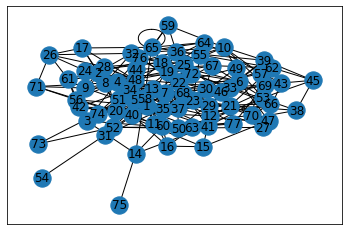

In [10]:
print(f"The Number of Nodes in this network are: {grpn}")

print(f"The Number of links are: {gpeg}")

print(f"The average clustering coefficient is: {round(avgcl, 2)}")

print(f"The average shortest path is: {round(avgsh, 2)}")

print(f"The average degree for this network is: {round(avgdrg, 2)}")

nx.draw_networkx(grp)

The second part

In [11]:
grg = nx.Graph()

for i in ac.index.values:
    grg.add_edge(ac['source'][i],ac['target'][i])

In [12]:
grng = grg.number_of_nodes()

gpegr = grg.number_of_edges()

avgcc = nx.average_clustering(grg)

rgsh = nx.average_shortest_path_length(grg)

avgrg = np.mean(list(dict(grg.degree()).values()))

The Number of Nodes in this network are: 71
The Number of links are: 200
The average clustering coefficient is: 0.42
The average shortest path is: 3.17
The average degree for this network is: 5.63


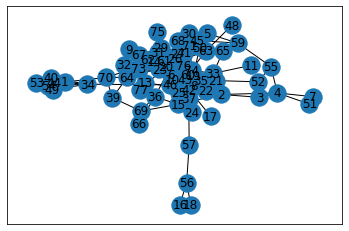

In [13]:
print(f"The Number of Nodes in this network are: {grng}")

print(f"The Number of links are: {gpegr}")

print(f"The average clustering coefficient is: {round(avgcc, 2)}")

print(f"The average shortest path is: {round(rgsh, 2)}")

print(f"The average degree for this network is: {round(avgrg, 2)}")

nx.draw_networkx(grg)

## Part 2

In [14]:
# starting with the first network 

swgrp = grp.number_of_nodes()
np.log(swgrp)

nt =  nx.average_clustering(nx.watts_strogatz_graph(swgrp, 6, 0 , seed = 123))
pnt = 1 - pow(avgcl/nt,1/3) 

ant = nx.watts_strogatz_graph(swgrp, 6, pnt ,seed =42 )
bnt = nx.average_clustering(ant)
cnt = nx.average_shortest_path_length(ant)
dnt = ant.number_of_nodes()
ent = ant.number_of_edges()
fnt = 2*ant.number_of_edges()/ant.number_of_nodes()
gnt = np.mean(list(dict(ant.degree()).values()))

In [15]:
print(ant)
print(f"The average clustering coefficient is: {bnt}")
print(f"The average shortest path is: {cnt}")
print(f"The Number of Nodes in this network are: {dnt}")
print(f"The Number of links are: {ent}")
print(f"The Number of squared links are: {fnt}")
print(f"The average degree for this network is: {gnt}")

Graph with 77 nodes and 231 edges
The average clustering coefficient is: 0.14855699855699847
The average shortest path is: 2.659261790840738
The Number of Nodes in this network are: 77
The Number of links are: 231
The Number of squared links are: 6.0
The average degree for this network is: 6.0


For the second part

In [16]:
secgrp = grg.number_of_nodes()
np.log(secgrp)

sect =  nx.average_clustering(nx.watts_strogatz_graph(secgrp, 6, 0 , seed = 123))
secn = 1 - pow(avgcc/sect,1/3) 

asc = nx.watts_strogatz_graph(secgrp, 6, secn ,seed = 80 )
bsc = nx.average_clustering(asc)
csc = nx.average_shortest_path_length(asc)
dsc = asc.number_of_nodes()
esc = asc.number_of_edges()
fsc = 2*asc.number_of_edges()/asc.number_of_nodes()
gsc = np.mean(list(dict(asc.degree()).values()))

In [17]:
print(asc)
print(f"The average clustering coefficient is: {bsc}")
print(f"The average shortest path is: {csc}")
print(f"The Number of Nodes in this network are: {dsc}")
print(f"The Number of links are: {esc}")
print(f"The Number of squared links are: {fsc}")
print(f"The average degree for this network is: {gsc}")

Graph with 71 nodes and 213 edges
The average clustering coefficient is: 0.42105969148222666
The average shortest path is: 3.148490945674044
The Number of Nodes in this network are: 71
The Number of links are: 213
The Number of squared links are: 6.0
The average degree for this network is: 6.0


## Part 3

In [18]:
pgmodel = avgdrg/(swgrp - 1)
bl = nx.erdos_renyi_graph(swgrp, pgmodel, seed = False, directed = False)

print('The average clustering coefficient is: ',nx.average_clustering(bl))
print('The average shortest path is: ',nx.average_shortest_path_length(bl))
print('The number of nodes are: ' , bl.number_of_nodes())
print('The number of edges are: ' , bl.number_of_edges())
print('The average degree of the graph is: ', np.mean(list(dict(bl.degree()).values())))

The average clustering coefficient is:  0.08862731784809703
The average shortest path is:  2.4008885850991115
The number of nodes are:  77
The number of edges are:  271
The average degree of the graph is:  7.038961038961039


Second Part 

In [23]:
prmodel = avgcc/(secgrp - 1)
cl = nx.erdos_renyi_graph(secgrp, prmodel, seed = False, directed = False)

print('The average clustering coefficient is: ', nx.average_clustering(cl))
#print('The average shortest path is: ',nx.average_shortest_path_length(cl))
print('The number of nodes are: ', cl.number_of_nodes())
print('The number of edges are: ', cl.number_of_edges())
print('The average degree of the graph is: ', np.mean(list(dict(cl.degree()).values())))

The average clustering coefficient is:  0.0
The number of nodes are:  71
The number of edges are:  20
The average degree of the graph is:  0.5633802816901409


## Part 4

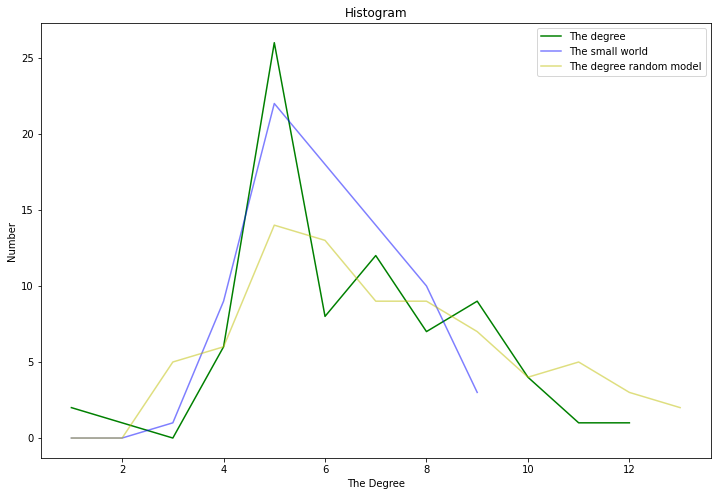

In [36]:
dgrdo = list(dict(grp.degree()).values())
dgrdw = list(dict(ant.degree()).values())
dgrdh = list(dict(bl.degree()).values())

brd = range(1,max(dgrdo) + 2)
bw = range(1,max(dgrdw) + 2)
bbg = range(1,max(dgrdh) + 2)

projrd, pnrd = np.histogram(dgrdo, bins = brd)
projw, pnw = np.histogram(dgrdw, bins = bw)
projh, pnh = np.histogram(dgrdh, bins = bbg)

fig, ax = plt.subplots(figsize = (12, 8))
plt.plot(pnrd[:-1], projrd, label = 'The degree',color='g')
plt.plot(pnw[:-1], projw, label = 'The small world',color='b',alpha = 0.5)
plt.plot(pnh[:-1], projh, label = 'The degree random model', color = 'y', alpha = 0.5)

plt.title('Histogram')
plt.ylabel('Number')
plt.xlabel('The Degree')
plt.legend(loc = "upper right")
plt.savefig('first_plot.png')
plt.show()

Second Part

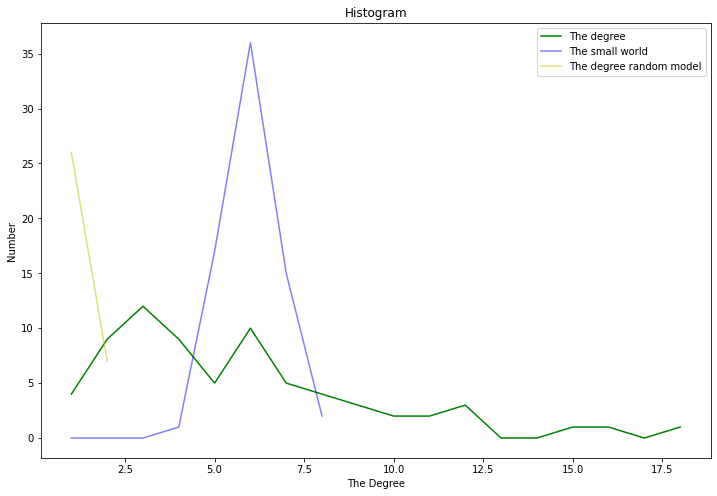

In [35]:
scrdo = list(dict(grg.degree()).values())
scrdw = list(dict(asc.degree()).values())
scrdh = list(dict(cl.degree()).values())

srd = range(1,max(scrdo) + 2)
sw = range(1,max(scrdw) + 2)
sbg = range(1,max(scrdh) + 2)

scsjrd, ssrd = np.histogram(scrdo, bins = srd)
scsjw, ssw = np.histogram(scrdw, bins = sw)
scsjh, ssh = np.histogram(scrdh, bins = sbg)

fig, ax = plt.subplots(figsize = (12, 8))
plt.plot(ssrd[:-1], scsjrd, label = 'The degree',color='g')
plt.plot(ssw[:-1], scsjw, label = 'The small world',color='b',alpha = 0.5)
plt.plot(ssh[:-1], scsjh, label = 'The degree random model', color = 'y', alpha = 0.5)

plt.title('Histogram')
plt.ylabel('Number')
plt.xlabel('The Degree')
plt.legend(loc = "upper right")
plt.savefig('second_plot.png')